# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
bc_df = pd.read_csv("bc2.csv")

### Observe the no.of records in dataset and type of each feature 

In [3]:
bc_df.shape

(699, 11)

There are 699 records in the dataset

In [4]:
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [5]:
bc_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


### Check Missing Values

In [6]:
bc_df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [7]:
bc_df.describe(include = 'all')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [8]:
for value in ['Bare Nuclei']:
    print(value,":", sum(bc_df[value] == '?'))

Bare Nuclei : 16


In [9]:
for value in ['Bare Nuclei']:
    replaceValue = bc_df.describe(include='all')[value][2]
    bc_df[value][bc_df[value]=='?'] = replaceValue

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### Print and plot the distribution of target variable (Class - using Histogram) 

In [10]:
% matplotlib inline

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

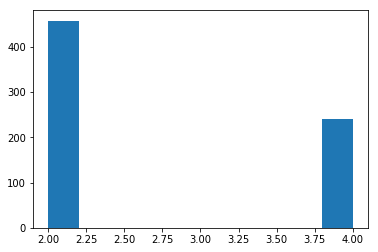

In [11]:
plt.hist(bc_df['Class'])

### convert the datatype of Bare Nuclei to `int`

In [12]:
bc_df['Bare Nuclei'].astype(int)

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      1
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: int32

### Standardization of Data (Use Standard Scaler)

In [13]:
from sklearn import preprocessing
preprocessing.StandardScaler(bc_df)

StandardScaler(copy=          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1
1    1002945               5          4           4                  5
2    1015425               3          1           1                  1   ...7                6        1      4
698                4        1      4

[699 rows x 11 columns],
        with_mean=True, with_std=True)

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08CE5C50>,
      dtype=object)

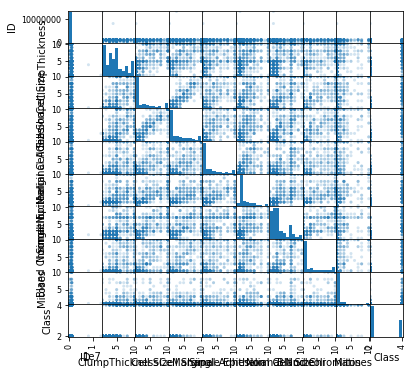

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(bc_df,alpha=0.2,figsize=(6, 6))

In [15]:
bc_df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.060051,-0.052072,-0.034901,-0.080226
ClumpThickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
Cell Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
Cell Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
Normal Nucleoli,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
Class,-0.080226,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [16]:
# Based on above dropping Cell Shape
bc_df=bc_df.drop("Cell Shape",axis=1)

In [17]:
bc_df.head()

,ID,ClumpThickness,Cell Size,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,2,1,3,1,1,2
1,1002945,5,4,5,7,10,3,2,1,2
2,1015425,3,1,1,2,2,3,1,1,2
3,1016277,6,8,1,3,4,3,7,1,2
4,1017023,4,1,3,2,1,3,1,1,2


### Divide the dataset into feature set and target set

In [18]:
X=bc_df.drop("Class",axis=1)
Y=bc_df.pop("Class")

### Divide the Training and Test sets in 70:30 

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

### Model 1 : Implement a default Decision Tree model with no attributes

In [20]:
bc_model = DecisionTreeClassifier(criterion = 'entropy' ,random_state=0)
bc_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [21]:
bc_model.feature_importances_

array([0.03203388, 0.03856382, 0.70515717, 0.00783841, 0.01971302,
       0.15136115, 0.        , 0.04533256, 0.        ])

### Check the training & test accuracy of model 1 

In [22]:
# Accuracy with Test data
Y_pred=bc_model.predict(X_test)
acc_test=metrics.accuracy_score(Y_test,Y_pred)
print(acc_test)

0.9333333333333333


In [23]:
# Accuracy with Training data
Y2_pred=bc_model.predict(X_train)
acc_train=metrics.accuracy_score(Y_train,Y2_pred)
print(acc_train)

1.0


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [24]:
bc_model2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, max_leaf_nodes=5, random_state=0)
bc_model2.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Check the training & test accuracy of model 2

In [25]:
# Accuracy with Test data
Y_pred_mod2=bc_model2.predict(X_test)
acc_test_mod2=metrics.accuracy_score(Y_test,Y_pred_mod2)
print(acc_test_mod2)

0.9476190476190476


In [26]:
# Accuracy with Training data
Y_pred_Training_mod2=bc_model2.predict(X_train)
acc_test_mod2=metrics.accuracy_score(Y_train,Y_pred_Training_mod2)
print(acc_test_mod2)

0.9713701431492843


### Print the confusion matrix of model 1 and model 2

In [27]:
#Model1
cm_mod1=metrics.confusion_matrix(Y_test,Y_pred)
print(cm_mod1)

[[126   9]
 [  5  70]]


In [28]:
#Model2
cm_mod2=metrics.confusion_matrix(Y_test,Y_pred_mod2)
print(cm_mod2)

[[126   9]
 [  2  73]]
